In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Position_Salaries.csv')

In [3]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [8]:
df.info

<bound method DataFrame.info of             Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000>

In [6]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [10]:
df.isnull().any()

Position    False
Level       False
Salary      False
dtype: bool

In [11]:
df.shape

(10, 3)

In [12]:
df.corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


In [16]:
x=df.iloc[:,1:2].values
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [17]:
y=df.iloc[:,-1].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

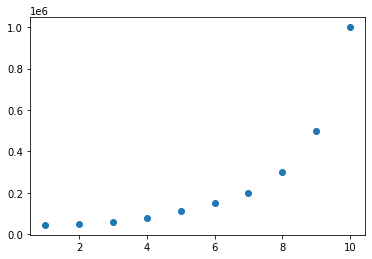

In [18]:
plt.scatter(x,y)

In [19]:
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures

In [44]:
#degree can be any, higher the degree more accuracy
poly=PolynomialFeatures(degree=10)
x_poly=poly.fit_transform(x)
x_poly

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.00000000e+00, 4.00000000e+00, 8.00000000e+00,
        1.60000000e+01, 3.20000000e+01, 6.40000000e+01, 1.28000000e+02,
        2.56000000e+02, 5.12000000e+02, 1.02400000e+03],
       [1.00000000e+00, 3.00000000e+00, 9.00000000e+00, 2.70000000e+01,
        8.10000000e+01, 2.43000000e+02, 7.29000000e+02, 2.18700000e+03,
        6.56100000e+03, 1.96830000e+04, 5.90490000e+04],
       [1.00000000e+00, 4.00000000e+00, 1.60000000e+01, 6.40000000e+01,
        2.56000000e+02, 1.02400000e+03, 4.09600000e+03, 1.63840000e+04,
        6.55360000e+04, 2.62144000e+05, 1.04857600e+06],
       [1.00000000e+00, 5.00000000e+00, 2.50000000e+01, 1.25000000e+02,
        6.25000000e+02, 3.12500000e+03, 1.56250000e+04, 7.81250000e+04,
        3.90625000e+05, 1.95312500e+06, 9.76562500e+

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
pr=LinearRegression()
pr.fit(x_poly,y)

LinearRegression()

In [50]:
y_pred=pr.predict(x_poly)
y_pred

array([  45000.00007159,   49999.99979823,   60000.00005762,
         79999.99999759,  109999.99993885,  149999.99974203,
        199999.99944663,  299999.99869061,  499999.99895048,
       1000000.00330114])

In [49]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [42]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

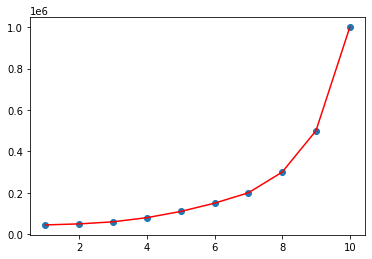

In [51]:
plt.scatter(x,y)
plt.plot(x,y_pred,'r')

In [55]:
y_result=pr.predict(poly.transform([[11]])) #[[]] for double array 2D
y_result[0]

4190208.3040556908